# Pandas１００本ノックR版
2024/2/1 Colab用

## Googleドライブのマウント手順
1. ランタイム ➡ ランタイムのタイプを変更 ➡ Python3 に設定  
2. PythonのコードでGoogleドライブをマウント  
3. ランタイム ➡ ランタイムのタイプを変更 ➡ R に設定

In [1]:
# prompt: PythonでGoogleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ここで、ランタイム ➡ ランタイムのタイプを変更 ➡ R に設定する

## Index
1. 基礎 (1 - 13)
2. データ抽出 (14 - 32)
3. データ加工 (33 - 58)
4. マージと連結(59 - 65)
5. 統計 (66 - 79)
6. ラベリング (80 - 81)
7. プロット (82 - 89)
8. タイタニック号の生存者予測 (90 - 100)  

In [1]:
# Rのバージョン確認
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.34   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle

In [2]:
getwd() #wd (working directory) 確認getwd() #wd 確認

[1] "/content"

In [3]:
# wd の変更
setwd("/content/drive/MyDrive/_公開講座/2021/12_Python_vs_R/R/")
getwd() #wd 確認

[1] "/content/drive/MyDrive/_公開講座/2021/12_Python_vs_R/R"

In [5]:
# wd の内容確認
print(list.files())

 [1] "data"                     "R_All_answer_colab.ipynb"
 [3] "R_All_answer.ipynb"       "Week-01_answer.ipynb"    
 [5] "Week-02_answer.ipynb"     "Week-03_answer.ipynb"    
 [7] "Week-04_answer.ipynb"     "Week-05_answer.ipynb"    
 [9] "Week-06_answer.ipynb"     "Week-07_answer.ipynb"    
[11] "Week-08_answer.ipynb"     "Week-09_answer.ipynb"    
[13] "Week-10_answer.ipynb"    


In [6]:
# DataFrameの準備
# 相対パス
df <- read.csv("./data/titanic3.csv", header=T)
df2 <- read.csv("./data/data1.csv", header=T)
df3 <- read.csv("./data/data1_2.csv", header=T)
df4 <- read.csv("./data/data1_3.csv", header=T)
df5 <- read.csv("./data/data2.csv", header=T, fileEncoding = "CP932")

# 基礎 (1 - 13)

In [7]:
# 【1】
# dfに読み込んだデータの最初の5行を表示# 【1】
# dfに読み込んだデータの最初の5行を表示

head(df,5) # default だと最初の６行を表示

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"


In [8]:
# 【2】
# dfに読み込んだデータの最後の5行を表示

tail(df,5) # 最後の５行を表示

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1305,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,,C,,328,
1306,3,0,"Zabour, Miss. Thamine",female,NA,1,0,2665,14.4542,,C,,NA,
1307,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,,C,,304,
1308,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,,C,,NA,
1309,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,,S,,NA,


In [9]:
# 【3】
# dfのDataFrameサイズを確認

dim(df)

[1] 1309   14

In [10]:
# 【4】
# inputフォルダ内のdata1.csvファイルを
# 読み込みdf2に格納して、最初の5行を表示

df2 <- read.csv("./data/data1.csv", header=T)
head(df2,5)

,name,class,English,Mathmatics,History
,<chr>,<int>,<int>,<int>,<int>
1,A,1,80,55,65
2,B,1,55,100,83
3,C,2,65,70,95
4,D,1,40,63,70
5,E,2,76,82,79


In [11]:
# 【5】
# dfのfareの列で昇順に並び替えて表示

# 参考： http://taustation.com/r-dataframe-sort/
df[order(df$fare),]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
8,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,,NA,"Belfast, NI"
71,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NA,0,0,112051,0.0000,,S,,NA,"Liverpool, England / Belfast"
126,1,0,"Fry, Mr. Richard",male,NA,0,0,112058,0.0000,B102,S,,NA,
151,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,,110,
171,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S,C,NA,Liverpool
224,1,0,"Parr, Mr. William Henry Marsh",male,NA,0,0,112052,0.0000,,S,,NA,Belfast
235,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,,S,,NA,"Rotterdam, Netherlands"
364,2,0,"Campbell, Mr. William",male,NA,0,0,239853,0.0000,,S,,NA,Belfast
385,2,0,"Cunningham, Mr. Alfred Fleming",male,NA,0,0,239853,0.0000,,S,,NA,Belfast


In [12]:
# 降順
df[order(df$fare, decreasing=T),]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
50,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NA,"Austria-Hungary / Germantown, Philadelphia, PA"
51,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NA,"Germantown, Philadelphia, PA"
184,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,3,NA,
303,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,,C,3,NA,
112,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.0000,C23 C25 C27,S,10,NA,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Ethel Flora",female,28,3,2,19950,263.0000,C23 C25 C27,S,10,NA,"Winnipeg, MB"
114,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S,10,NA,"Winnipeg, MB"
115,1,0,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S,,NA,"Winnipeg, MB"
116,1,0,"Fortune, Mr. Mark",male,64,1,4,19950,263.0000,C23 C25 C27,S,,NA,"Winnipeg, MB"


In [13]:
# 【6】
# df_copyにdfをコピーして、最初の5行を表示

df_copy <- df
head(df,5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"


In [14]:
df_copy <- df_copy[0:2]
head(df_copy,5)

,pclass,survived
,<int>,<int>
1,1,1
2,1,1
3,1,0
4,1,0
5,1,0


In [15]:
head(df,5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"


### 結論：Rでは deep copy（値渡しを行っている）
https://dichika.hateblo.jp/entry/20151223/p1  
http://www.singularpoint.org/blog/r/r-call-by-value-or-reference/

In [16]:
# 【7】
# ① dfの各列のデータ型を確認
# ② dfのcabinの列のデータ型を確認

str(df)
print("-------------------")
str(df["cabin"])
print("-------------------")
str(df$cabin)
print("-------------------")
str(df[10]) # R の列のインデックスは１から始まる

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" "" "" ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...
[1] "-------------------"
'data.frame':	1309 obs. of  1 variable:
 $ cabin: chr  "B5" "C2

In [17]:
# class() を使うとこうなる
class(df)
print("-------------------")
class(df["cabin"])
print("-------------------")
class(df$cabin)
print("-------------------")
class(df[10]) # R の列のインデックスは１から始まる

[1] "data.frame"

[1] "-------------------"


[1] "data.frame"

[1] "-------------------"


[1] "character"

[1] "-------------------"


[1] "data.frame"

In [18]:
# 【8】
# ① dfのpclassの列のデータ型をdtypeで確認
# ② 数値型から文字型に変換し、データ型をdtypeで確認

class(df$pclass)

[1] "integer"

In [19]:
# http://cse.naro.affrc.go.jp/takezawa/r-tips/r/25.html
df$pclass <- as.character(df$pclass)
class(df$pclass)

[1] "character"

In [20]:
# 【9】
# dfのレコード数(行数)を確認

nrow(df)

[1] 1309

In [21]:
# 列数は
ncol(df)

[1] 14

In [22]:
# 【10】
# dfのレコード数(行数)、各列のデータ型、欠損値の有無を確認

str(df)

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : chr  "1" "1" "1" "1" ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" "" "" ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...


In [23]:
# str() には欠損値情報がはいっていないので
colSums(is.na(df))


pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0       263         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [24]:
# 【11】
# dfのsex,cabinの列の要素を確認

print(df$sex)

   [1] "female" "male"   "female" "male"   "female" "male"   "female" "male"  
   [9] "female" "male"   "male"   "female" "female" "female" "male"   "male"  
  [17] "male"   "female" "female" "male"   "male"   "female" "male"   "female"
  [25] "female" "male"   "male"   "female" "female" "male"   "male"   "male"  
  [33] "female" "female" "male"   "female" "female" "male"   "male"   "male"  
  [41] "male"   "female" "female" "female" "female" "male"   "male"   "male"  
  [49] "female" "male"   "female" "male"   "male"   "male"   "male"   "female"
  [57] "male"   "female" "male"   "female" "male"   "female" "male"   "female"
  [65] "male"   "female" "female" "female" "male"   "female" "male"   "male"  
  [73] "female" "female" "male"   "male"   "female" "male"   "female" "female"
  [81] "male"   "male"   "female" "female" "male"   "female" "male"   "male"  
  [89] "female" "male"   "female" "male"   "female" "male"   "male"   "female"
  [97] "male"   "female" "female" "female" "male"   

In [25]:
print(df$cabin)

   [1] "B5"              "C22 C26"         "C22 C26"         "C22 C26"        
   [5] "C22 C26"         "E12"             "D7"              "A36"            
   [9] "C101"            ""                "C62 C64"         "C62 C64"        
  [13] "B35"             ""                "A23"             ""               
  [17] "B58 B60"         "B58 B60"         "D15"             "C6"             
  [21] "D35"             "D35"             "C148"            ""               
  [25] "C97"             ""                "B49"             "B49"            
  [29] "C99"             "C52"             "T"               "A31"            
  [33] "C7"              "C103"            "D22"             ""               
  [37] "E33"             ""                "A21"             "B10"            
  [41] ""                "B4"              "C101"            "D15"            
  [45] "E40"             "B38"             ""                "E24"            
  [49] ""                "B51 B53 B55"     "B51 B53 

In [26]:
# 列に含まれる要素の確認にはunique()を使用
# https://a-habakiri.hateblo.jp/entry/2016/11/28/220443
print(unique(df$sex))

[1] "female" "male"  


In [27]:
print(unique(df$cabin))

  [1] "B5"              "C22 C26"         "E12"             "D7"             
  [5] "A36"             "C101"            ""                "C62 C64"        
  [9] "B35"             "A23"             "B58 B60"         "D15"            
 [13] "C6"              "D35"             "C148"            "C97"            
 [17] "B49"             "C99"             "C52"             "T"              
 [21] "A31"             "C7"              "C103"            "D22"            
 [25] "E33"             "A21"             "B10"             "B4"             
 [29] "E40"             "B38"             "E24"             "B51 B53 B55"    
 [33] "B96 B98"         "C46"             "E31"             "E8"             
 [37] "B61"             "B77"             "A9"              "C89"            
 [41] "A14"             "E58"             "E49"             "E52"            
 [45] "E45"             "B22"             "B26"             "C85"            
 [49] "E17"             "B71"             "B20"             "A34

In [28]:
# 【12】
# dfの列名一覧をlist形式で表示

list(colnames(df))

[[1]]
 [1] "pclass"    "survived"  "name"      "sex"       "age"       "sibsp"    
 [7] "parch"     "ticket"    "fare"      "cabin"     "embarked"  "boat"     
[13] "body"      "home.dest"

In [29]:
# 【13】
# dfのインデックス一覧をndarray形式で表示 --> ndarray Python の numpy ライブラリーのデータ型なのでRでは単に表示のみ

# https://www.it-swarm-ja.tech/ja/r/r%E3%81%A7%E8%A1%8C%E3%82%A4%E3%83%B3%E3%83%87%E3%83%83%E3%82%AF%E3%82%B9%E7%95%AA%E5%8F%B7%E3%82%92%E5%8F%96%E5%BE%97%E3%81%99%E3%82%8B%E3%81%AB%E3%81%AF%E3%81%A9%E3%81%86%E3%81%99%E3%82%8C%E3%81%B0%E3%82%88%E3%81%84%E3%81%A7%E3%81%99%E3%81%8B%EF%BC%9F/968008027/
idx <- as.numeric(rownames(df))
print(idx)
# Python では index は 0 から始まるが、Rでは index は 1 から始まる

   [1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   22   23   24   25   26   27   28
  [29]   29   30   31   32   33   34   35   36   37   38   39   40   41   42
  [43]   43   44   45   46   47   48   49   50   51   52   53   54   55   56
  [57]   57   58   59   60   61   62   63   64   65   66   67   68   69   70
  [71]   71   72   73   74   75   76   77   78   79   80   81   82   83   84
  [85]   85   86   87   88   89   90   91   92   93   94   95   96   97   98
  [99]   99  100  101  102  103  104  105  106  107  108  109  110  111  112
 [113]  113  114  115  116  117  118  119  120  121  122  123  124  125  126
 [127]  127  128  129  130  131  132  133  134  135  136  137  138  139  140
 [141]  141  142  143  144  145  146  147  148  149  150  151  152  153  154
 [155]  155  156  157  158  159  160  161  162  163  164  165  166  167  168
 [169]  169  170  171  172  173  174  175  176  177  178  179  180  181  182

# データ抽出 (14 - 32)

In [30]:
# 【14】
# dfのnameの列のみ表示

df$name

[1] "Allen, Miss. Elisabeth Walton"                                                     
   [2] "Allison, Master. Hudson Trevor"                                                    
   [3] "Allison, Miss. Helen Loraine"                                                      
   [4] "Allison, Mr. Hudson Joshua Creighton"                                              
   [5] "Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"                                   
   [6] "Anderson, Mr. Harry"                                                               
   [7] "Andrews, Miss. Kornelia Theodosia"                                                 
   [8] "Andrews, Mr. Thomas Jr"                                                            
   [9] "Appleton, Mrs. Edward Dale (Charlotte Lamson)"                                     
  [10] "Artagaveytia, Mr. Ramon"                                                           
  [11] "Astor, Col. John Jacob"                                                            
  [12] "Astor, Mrs. John Jacob (Madeleine Talmadge Force)"                                 
  [13] "Aubart, Mme. Leontine Pauline"                                                     
  [14] "Barber, Miss. Ellen \"Nellie\""                                                    
  [15] "Barkworth, Mr. Algernon Henry Wilson"                                              
  [16] "Baumann, Mr. John D"                                                               
  [17] "Baxter, Mr. Quigg Edmond"                                                          
  [18] "Baxter, Mrs. James (Helene DeLaudeniere Chaput)"                                   
  [19] "Bazzani, Miss. Albina"                                                             
  [20] "Beattie, Mr. Thomson"                                                              
  [21] "Beckwith, Mr. Richard Leonard"                                                     
  [22] "Beckwith, Mrs. Richard Leonard (Sallie Monypeny)"                                  
  [23] "Behr, Mr. Karl Howell"                                                             
  [24] "Bidois, Miss. Rosalie"                                                             
  [25] "Bird, Miss. Ellen"                                                                 
  [26] "Birnbaum, Mr. Jakob"                                                               
  [27] "Bishop, Mr. Dickinson H"                                                           
  [28] "Bishop, Mrs. Dickinson H (Helen Walton)"                                           
  [29] "Bissette, Miss. Amelia"                                                            
  [30] "Bjornstrom-Steffansson, Mr. Mauritz Hakan"                                         
  [31] "Blackwell, Mr. Stephen Weart"                                                      
  [32] "Blank, Mr. Henry"                                                                  
  [33] "Bonnell, Miss. Caroline"                                                           
  [34] "Bonnell, Miss. Elizabeth"                                                          
  [35] "Borebank, Mr. John James"                                                          
  [36] "Bowen, Miss. Grace Scott"                                                          
  [37] "Bowerman, Miss. Elsie Edith"                                                       
  [38] "Bradley, Mr. George (\"George Arthur Brayton\")"                                   
  [39] "Brady, Mr. John Bertram"                                                           
  [40] "Brandeis, Mr. Emil"                                                                
  [41] "Brewe, Dr. Arthur Jackson"                                                         
  [42] "Brown, Mrs. James Joseph (Margaret Tobin)"                                         
  [43] "Brown, Mrs. John Murray (Caroline Lane Lamson)"                                    
  [44] "Bucknell, Mrs. William Robert (Emma Eli

In [31]:
# もしくは
df["name"]

name
<chr>
"Allen, Miss. Elisabeth Walton"
"Allison, Master. Hudson Trevor"
"Allison, Miss. Helen Loraine"
"Allison, Mr. Hudson Joshua Creighton"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
"Anderson, Mr. Harry"
"Andrews, Miss. Kornelia Theodosia"
"Andrews, Mr. Thomas Jr"
"Appleton, Mrs. Edward Dale (Charlotte Lamson)"


In [32]:
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [33]:
# 【15】
# dfのnameとsexの列のみ表示

# Python の Pandas のように、df[['name','sex']] で列名で複数の行を抽出するのはできないらしい
# カラム番号が続いているので
# https://qiita.com/gigatune/items/f3aa0afef7f50ab791cd
df[, 3:4]

name,sex
<chr>,<chr>
"Allen, Miss. Elisabeth Walton",female
"Allison, Master. Hudson Trevor",male
"Allison, Miss. Helen Loraine",female
"Allison, Mr. Hudson Joshua Creighton",male
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female
"Anderson, Mr. Harry",male
"Andrews, Miss. Kornelia Theodosia",female
"Andrews, Mr. Thomas Jr",male
"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female


In [34]:
# 【16】
# dfのindex(行)の4行目までを表示

# https://ultrabem-branch3.com/informatics/r/dataframe_extract#row
df[1:4,]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"


In [35]:
# 【17】
# dfのindex(行)の4行目から10行目までを表示

df[4:10,]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"
8,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,,NA,"Belfast, NI"
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
10,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,,C,,22,"Montevideo, Uruguay"


In [36]:
# 【18】
# locを使ってdf全体を表示 --> 全体を表示

df

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"
1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"
1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,,NA,"Belfast, NI"
1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"


In [37]:
# 【19】
# locを使ってdfのfare列をすべて表示 --> 全体を表示

df["fare"]

fare
<dbl>
211.3375
151.5500
151.5500
151.5500
151.5500
26.5500
77.9583
0.0000
51.4792


In [38]:
# 【20】
# locを使ってdfのfare列の10行目まで表示 --> 10行目までを表示

df["fare"][1:10,]

[1] 211.3375 151.5500 151.5500 151.5500 151.5500  26.5500  77.9583   0.0000
 [9]  51.4792  49.5042

In [39]:
# 【21】
# locを使ってdfのnameとticketの列をすべて表示 --> Python限定
# ６行のみ表示に変更

head(df[,c("name", "ticket")])
# 解説： c(A,B) でベクトルを作って列を抽出
# https://htsuda.net/stats/dataset.html

,name,ticket
,<chr>,<chr>
1,"Allen, Miss. Elisabeth Walton",24160
2,"Allison, Master. Hudson Trevor",113781
3,"Allison, Miss. Helen Loraine",113781
4,"Allison, Mr. Hudson Joshua Creighton",113781
5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",113781
6,"Anderson, Mr. Harry",19952


In [40]:
# 【22】
# locを使ってdfのnameからcabinまでの列をすべて表示 --> Python限定
# ６行のみ表示に変更

head(df[,3:10])

,name,sex,age,sibsp,parch,ticket,fare,cabin
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>
1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5
2,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26
3,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26
4,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26
5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26
6,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12


In [41]:
# 【23】
# ilocを使ってdfのage列を5行目まで表示

df[1:5,5]

[1] 29.00  0.92  2.00 30.00 25.00

In [42]:
# 【24】
# dfのname,age,sexの列のみ抽出しdf_copyに格納
# その後outputフォルダにcsvファイルで出力

df_copy <- df[c("name", "age", "sex")]
head(df_copy)

,name,age,sex
,<chr>,<dbl>,<chr>
1,"Allen, Miss. Elisabeth Walton",29.00,female
2,"Allison, Master. Hudson Trevor",0.92,male
3,"Allison, Miss. Helen Loraine",2.00,female
4,"Allison, Mr. Hudson Joshua Creighton",30.00,male
5,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,female
6,"Anderson, Mr. Harry",48.00,male


In [43]:
# https://a-habakiri.hateblo.jp/entry/2016/12/12/222806
#setwd("C:/Users/iiats/OneDrive/デスクトップ/１００本ノックチャレンジ/03_R_100_knocks/Answers/data")
write.csv(df_copy, "./data/df_copy.csv")

In [44]:
# write.csv() で出力するとインデックスの列ができます。（変更はできない）

In [45]:
# 【25】
# dfのage列の値が30以上のデータのみ抽出

df[df$age>=30,]
# https://a-habakiri.hateblo.jp/entry/2016/12/12/222806

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"
8,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,,NA,"Belfast, NI"
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
10,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,,C,,22,"Montevideo, Uruguay"
11,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.5250,C62 C64,C,,124,"New York, NY"
15,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S,B,NA,"Hessle, Yorks"
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [46]:
# 欠損値が含まれる行を全て削除する方法
# しかしこれでは年齢以外の箇所に欠損値がある場合も削除されてしまう。--> 課題
na.omit(df[df$age>=30,])
# https://stats.biopapyrus.jp/r/basic/nan.html

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
10,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,,C,,22,"Montevideo, Uruguay"
11,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,,124,"New York, NY"
40,1,0,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C,,208,"Omaha, NE"
61,1,0,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,C46,S,,172,"Little Onn Hall, Staffs"
82,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,,269,"Milwaukee, WI"
97,1,0,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C,,62,"Deephaven, MN / Cedar Rapids, IA"
102,1,0,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,A18,C,,133,"Philadelphia, PA"
129,1,0,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,,275,"St Anne's-on-Sea, Lancashire"


In [47]:
# 【26】
# dfのsex列がfemaleのデータのみ抽出

df[df$sex=="female",]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
12,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
13,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69.3000,B35,C,9,NA,"Paris, France"
14,1,1,"Barber, Miss. Ellen ""Nellie""",female,26,0,0,19877,78.8500,,S,6,NA,
18,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"


In [48]:
# 【27】
# dfのsex列がfemaleでかつageが40以上のデータのみ抽出

df[df$sex=="female" & df$age>=40,]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
18,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
22,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
24,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,,C,4,NA,
34,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,8,NA,"Birkdale, England Cleveland, Ohio"
36,1,1,"Bowen, Miss. Grace Scott",female,45,0,0,PC 17608,262.3750,,C,4,NA,"Cooperstown, NY"
42,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44,0,0,PC 17610,27.7208,B4,C,6,NA,"Denver, CO"
43,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59,2,0,11769,51.4792,C101,S,D,NA,"Belmont, MA"


In [49]:
# 【28】
# queryを用いてdfのsex列がfemaleでかつageが40以上のデータのみ抽出 --> Python限定

# これはスキップ


In [50]:
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [51]:
# 【29】
# dfのname列に文字列「Mrs」が含まれるデータを表示

# https://qiita.com/naofumi-fujii/items/71f41182a23ded86388b
# リブラリー dplyr の grepl() を使う

# install.packages("dplyr") # 一度だけでよい。
library(dplyr)

df %>% filter(grepl("Mrs", name))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C,7,NA,"Dowagiac, MI"
1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44,0,0,PC 17610,27.7208,B4,C,6,NA,"Denver, CO"
1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59,2,0,11769,51.4792,C101,S,D,NA,"Belmont, MA"
1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60,0,0,11813,76.2917,D15,C,8,NA,"Philadelphia, PA"


In [52]:
library(dplyr)

# 標準表記
head(filter(df, grepl("Mrs", name)))

# Pipe
df %>% filter(grepl("Mrs", name)) %>% head()

# 1行に1つの作業
df2 <- filter(df, grepl("Mrs", name))
head(df2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
3,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
4,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
5,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
6,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C,7,NA,"Dowagiac, MI"


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
3,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
4,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
5,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
6,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C,7,NA,"Dowagiac, MI"


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
3,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
4,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
5,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
6,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C,7,NA,"Dowagiac, MI"


In [53]:
# 【30】
# dfの中で文字型の列のみを表示

# 一度にする方法が分からないので半分手動で行った。 --> 一度でやる方法を見つけました。（後述）
str(df)

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : chr  "1" "1" "1" "1" ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" "" "" ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...


In [54]:
df[c("name", "sex", "ticket", "cabin", "embarked", "boat", "home.dest")]

name,sex,ticket,cabin,embarked,boat,home.dest
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
"Allen, Miss. Elisabeth Walton",female,24160,B5,S,2,"St Louis, MO"
"Allison, Master. Hudson Trevor",male,113781,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",female,113781,C22 C26,S,,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",male,113781,C22 C26,S,,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,113781,C22 C26,S,,"Montreal, PQ / Chesterville, ON"
"Anderson, Mr. Harry",male,19952,E12,S,3,"New York, NY"
"Andrews, Miss. Kornelia Theodosia",female,13502,D7,S,10,"Hudson, NY"
"Andrews, Mr. Thomas Jr",male,112050,A36,S,,"Belfast, NI"
"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,11769,C101,S,D,"Bayside, Queens, NY"


In [55]:
# 一発で処理する方法見つけました。
# https://www.trifields.jp/how-to-extract-specific-type-columns-from-data-frame-in-r-3058
Filter(is.factor, df)

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1   
2   
3   
4   
5   
6   
7   
8   
9   
10  
11  
12  
13  
14  
15  
16  
17  
18  
19  
20  
21  
22  
23  
24  
25  
26  
27  
28  
29  
30  
⋮   
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309

In [56]:
# 【31】
# dfの各列の要素数の確認

In [57]:
# 力業

In [58]:
colnames(df)

[1] "pclass"    "survived"  "name"      "sex"       "age"       "sibsp"    
 [7] "parch"     "ticket"    "fare"      "cabin"     "embarked"  "boat"     
[13] "body"      "home.dest"

In [59]:
# これは欠損値も１種類のデータとカウントする
for (i in 1:14){
    print(paste(colnames(df)[i], ": ", nrow(unique(df[i]))))
}

[1] "pclass :  3"
[1] "survived :  2"
[1] "name :  1307"
[1] "sex :  2"
[1] "age :  99"
[1] "sibsp :  7"
[1] "parch :  8"
[1] "ticket :  929"
[1] "fare :  282"
[1] "cabin :  187"
[1] "embarked :  4"
[1] "boat :  28"
[1] "body :  122"
[1] "home.dest :  370"


In [60]:
# Python の df.nunique() の様に一度で行う方法を誰か知りませか？

In [61]:
# 【32】
# dfのembarked列の要素と出現回数の確認

# またまた力業
unique(df[11])
print(paste("S: ", length(df[11][df[11]=="S"])))
print(paste("C: ", length(df[11][df[11]=="C"])))
print(paste("Q: ", length(df[11][df[11]=="Q"])))
print(paste("NaN: ", length(df[11][df[11]==""])))

,embarked
,<chr>
1,S
10,C
169,
207,Q


[1] "S:  914"
[1] "C:  270"
[1] "Q:  123"
[1] "NaN:  2"


In [62]:
# Python の df['embarked'].value_counts() の様に一度で行う方法を誰か知りませか？

# データ加工 (33 - 58)

In [63]:
# 【33】
# dfのindex名が「3」のage列を --> Rではindexが１から始まるので index名が「4」となる
# 30から40に変更し、先頭の5行を表示

In [64]:
# index「4」の行
df[4,]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"


In [65]:
# http://fujinitaka.hatenablog.com/entry/2018/07/08/022044
df[4,]["age"] <- lapply(df[4,]["age"], gsub, pattern="30", replacement = "40")
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,40,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [66]:
# もっとシンプルにこれでよいのか。
df <- read.csv("./data/titanic3.csv", header=T)
df[4,]["age"] <- "40"
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,40,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [67]:
# 【34】
# dfのsex列にてmale→0、femlae→1に
# 変更し、先頭の5行を表示

# http://fujinitaka.hatenablog.com/entry/2018/07/08/022044
df["sex"] <- lapply(df["sex"], gsub, pattern="female", replacement = "1") # maleを先にすると"female"の一部も置換してしまう
df["sex"] <- lapply(df["sex"], gsub, pattern="male", replacement = "0")
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,40,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [68]:
# dplyrを使う方法 --> Python の Pandas に比べると複雑だな
library(dplyr)
library(stringr)
df <- read.csv("./data/titanic3.csv", header=T)
df <- dplyr::mutate(df,sex=gsub(sex,pattern="female",replacement = "1", ignore.case = TRUE))
df <- dplyr::mutate(df,sex=gsub(sex,pattern="male",replacement = "0", ignore.case = TRUE))
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [69]:
# 【35】
# dfのfare列に100を足して、
# 先頭の5行を表示

df["fare"] <- df["fare"] + 100
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,311.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,251.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,251.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,251.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,251.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,126.5500,E12,S,3,NA,"New York, NY"


In [70]:
# 【36】
# dfのfare列を2を掛けて、
# 先頭の5行を表示

df["fare"] <- df["fare"] * 2
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,622.675,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,503.100,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,503.100,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,503.100,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,503.100,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,253.100,E12,S,3,NA,"New York, NY"


In [71]:
# 【37】
# dfのfare列を小数点以下で丸める

df['fare'] = lapply(df['fare'], round)
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,623,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,503,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,503,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,253,E12,S,3,NA,"New York, NY"


In [72]:
# 【38】
# dfに列名「test」で値がすべて1の
# カラムを追加し、先頭の5行を表示

df['test'] = 1
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,test
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,623,B5,S,2,NA,"St Louis, MO",1
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,503,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,503,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON",1
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",1
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,253,E12,S,3,NA,"New York, NY",1


In [73]:
# 【39】
# dfにcabinとembarkedの列を「_」で
# 結合した列を追加(列名は「test」)し、
# 先頭の5行を表示

In [74]:
# 力業

In [75]:
rn = dim(df)[1]
rn

[1] 1309

In [76]:
paste(df['cabin'][3,], '_', df['embarked'][3,])

[1] "C22 C26 _ S"

In [77]:
for (i in 1:rn){
        df["test"][i,] <- paste(df['cabin'][i,], '_', df['embarked'][i,])
       }

head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,test
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,623,B5,S,2,NA,"St Louis, MO",B5 _ S
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,503,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON",C22 C26 _ S
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",C22 C26 _ S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,503,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON",C22 C26 _ S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",C22 C26 _ S
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,253,E12,S,3,NA,"New York, NY",E12 _ S


In [78]:
# だいぶＲのデータフレームを扱えるようになってきました！

In [79]:
# 【40】
# dfにageとembarkedの列を「_」で
# 結合した列を追加(列名は「test」)し、
# 先頭の5行を表示

for (i in 1:rn){
        df["test"][i,] <- paste(df['age'][i,], '_', df['embarked'][i,])
       }

head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,test
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,623,B5,S,2,NA,"St Louis, MO",29 _ S
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,503,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON",0.92 _ S
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",2 _ S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,503,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON",30 _ S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,503,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",25 _ S
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,253,E12,S,3,NA,"New York, NY",48 _ S


In [80]:
# 【41】
# dfからbodyの列を削除し、最初の5行を表示

#削除したい行や列を選択し、NULLを代入することで削除ができる
df["body"] <- NULL
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,test
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,623,B5,S,2,"St Louis, MO",29 _ S
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,503,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0.92 _ S
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,503,C22 C26,S,,"Montreal, PQ / Chesterville, ON",2 _ S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,503,C22 C26,S,,"Montreal, PQ / Chesterville, ON",30 _ S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,503,C22 C26,S,,"Montreal, PQ / Chesterville, ON",25 _ S
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,253,E12,S,3,"New York, NY",48 _ S


In [81]:
# 別の方法
#インデックスを負の値にすると、その番号を除外した行列を返す性質を利用して、次のようにも書ける
df <- read.csv("./data/titanic3.csv", header=T)
df <- df[, -13]
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,"New York, NY"


In [82]:
# 【42】
# dfからインデックス名「3」の行を削除し、最初の5行を表示

df <- read.csv("./data/titanic3.csv", header=T)
head(df[-3,]) #行を削除

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NA,"Hudson, NY"


In [83]:
# 【43】
# df2の列名を'name', 'class', 'Biology', 'Physics', 'Chemistry'に変更
# df2の最初の5行を表示

head(df2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
3,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
4,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
5,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
6,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C,7,NA,"Dowagiac, MI"


In [84]:
colnames(df2) <- c('name', 'class', 'Biology', 'Physics', 'Chemistry')
head(df2)

,name,class,Biology,Physics,Chemistry,NA,NA,NA,NA,NA,NA,NA,NA,NA
,<chr>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NA,"Bayside, Queens, NY"
3,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NA,"New York, NY"
4,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NA,"Montreal, PQ"
5,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NA,"New York, NY"
6,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19,1,0,11967,91.0792,B49,C,7,NA,"Dowagiac, MI"


In [85]:
# 【44】
# df2の列名を'English'をBiology'に変更
# df2の最初の5行を表示

# http://tips-r.blogspot.com/2018/02/r.html
df2 <- read.csv("./data/data1.csv", header=T)
colnames(df2)[3] <- "Bioligy"
head(df2)

,name,class,Bioligy,Mathmatics,History
,<chr>,<int>,<int>,<int>,<int>
1,A,1,80,55,65
2,B,1,55,100,83
3,C,2,65,70,95
4,D,1,40,63,70
5,E,2,76,82,79
6,F,2,93,68,81


In [86]:
# 別の方法
df2 <- read.csv("./data/data1.csv", header=T)
colnames(df2)[which(colnames(df2)=="English")] <- "Biology"
head(df2)

,name,class,Biology,Mathmatics,History
,<chr>,<int>,<int>,<int>,<int>
1,A,1,80,55,65
2,B,1,55,100,83
3,C,2,65,70,95
4,D,1,40,63,70
5,E,2,76,82,79
6,F,2,93,68,81


In [91]:
# 【45】
# df2のインデックス名「1」を「11」に変更 ※ Pandas100 knocks から問題変更
# df2の最初の5行を表示

df2 <- read.csv("./data/data1.csv", header=T)
rownames(df2)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

In [89]:
rownames(df2)[2] <- '11'
head(rownames(df2))

[1] "1"  "11" "3"  "4"  "5"  "6"

In [92]:
# # もしくは
# rownames(df2)[which(rownames(df2)=='2')] <- '11'
# head(rownames(df2))

[1] "1"  "11" "3"  "4"  "5"  "6"

In [93]:
# 【46】
# dfのすべての列の欠損値数を確認

df <- read.csv("./data/titanic3.csv", header=T)
colSums(is.na(df))

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0       263         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [94]:
# 【47】
# dfのage列の欠損値に30を代入
# その後、ageの欠損値数を確認

df <- read.csv("./data/titanic3.csv", header=T)
df["age"][is.na(df["age"])] <- 30
colSums(is.na(df))

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0         0         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [95]:
# 別の方法
# https://www.it-swarm-ja.tech/ja/r/%E9%81%B8%E6%8A%9E%E3%81%97%E3%81%9F%E5%88%97%E3%81%AE%E3%83%86%E3%83%BC%E3%83%96%E3%83%AB%E3%81%AEna%E5%80%A4%E3%82%92%E7%BD%AE%E6%8F%9B%E3%81%99%E3%82%8B%E6%96%B9%E6%B3%95/1041462949/
df <- read.csv("./data/titanic3.csv", header=T)
df[, 5:5][is.na(df[, 5:5])] <- 30
colSums(is.na(df))

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0         0         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [96]:
# 【48】
# dfでひとつでも欠損値がある行を削除
# その後、dfの欠損値数を確認

df <- read.csv("./data/titanic3.csv", header=T)
df <- na.omit(df)
colSums(is.na(df))

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0         0         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        0         0         0         0         0         0

In [97]:
# 【49】
# dfのsurvivedの列をndarray形式(配列)で表示 --> R では配列に

# http://cse.naro.affrc.go.jp/takezawa/r-tips/r/25.html
df <- read.csv("./data/titanic3.csv", header=T)
as.matrix(df["survived"])

# as.array() ではエラーが出て、as.matrix() では変わっていない様です。
# 誰かわかりますか？

survived
1
1
0
0
0
1
1
0
1
0


In [98]:
# 【50】
# dfの行をシャッフルして表示

# https://www.it-swarm-ja.tech/ja/r/%E3%83%87%E3%83%BC%E3%82%BF%E3%83%95%E3%83%AC%E3%83%BC%E3%83%A0%E3%82%92%E8%A1%8C%E3%81%94%E3%81%A8%E3%81%8A%E3%82%88%E3%81%B3%E5%88%97%E3%81%94%E3%81%A8%E3%81%AB%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E5%8C%96%EF%BC%88%E3%81%BE%E3%81%9F%E3%81%AF%E4%B8%A6%E3%81%B9%E6%9B%BF%E3%81%88%EF%BC%89%E3%81%99%E3%82%8B%E3%81%AB%E3%81%AF%E3%81%A9%E3%81%86%E3%81%99%E3%82%8C%E3%81%B0%E3%82%88%E3%81%84%E3%81%A7%E3%81%99%E3%81%8B%EF%BC%9F/972584365/
df_tmp <- df[sample(nrow(df)),]
head(df_tmp)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
449,2,0,"Hocking, Mr. Samuel James Metcalfe",male,36,0,0,242963,13.0000,,S,,NA,"Devonport, England"
140,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58,0,1,PC 17582,153.4625,C125,S,3,NA,"Greenwich, CT"
153,1,1,"Hawksford, Mr. Walter James",male,NA,0,0,16988,30.0000,D45,S,3,NA,"Kingston, Surrey"
709,3,0,"Carlsson, Mr. Carl Robert",male,24,0,0,350409,7.8542,,S,,NA,"Goteborg, Sweden Huntley, IL"
508,2,0,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,,S,,NA,"Worcester, MA"
1217,3,1,"Smyth, Miss. Julia",female,NA,0,0,335432,7.7333,,Q,13,NA,


In [99]:
# 【51】
# dfの行をシャッフルし、インデックスを振り直して表示

# dplyrを使う方法
# https://uribo.hatenablog.com/entry/2015/10/12/164129
library(dplyr)
df_frac = sample_frac(tbl = df)
df_frac

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
3,0,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,,Q,,NA,"New York, NY"
3,0,"Barry, Miss. Julia",female,27.0,0,0,330844,7.8792,,Q,,NA,"New York, NY"
3,0,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5000,,S,,NA,
3,1,"Kelly, Miss. Mary",female,NA,0,0,14312,7.7500,,Q,D,NA,
1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NA,
2,0,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,,S,,236,"Rochester, NY"
2,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,,C,,NA,"New York, NY"
3,0,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,,S,,187,
3,0,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,,C,,NA,


In [100]:
dim(df_frac)

[1] 1309   14

In [101]:
# 【52】
# ①df2の重複行数をカウント
# ②df2の重複行を削除し、df2を表示
df2
print(dim(df2))

,name,class,English,Mathmatics,History
,<chr>,<int>,<int>,<int>,<int>
1,A,1,80,55,65
11,B,1,55,100,83
3,C,2,65,70,95
4,D,1,40,63,70
5,E,2,76,82,79
6,F,2,93,68,81
7,G,1,100,85,52
8,H,2,73,52,96
9,B,1,55,100,83


[1] 10  5


In [102]:
# ①
duplicated(df2)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE

In [103]:
sum(duplicated(df2))

[1] 2

In [104]:
# ②
# https://qiita.com/weda_654/items/97c8dbba9f8198845537
df2 = df2[!duplicated(df2),]
df2

,name,class,English,Mathmatics,History
,<chr>,<int>,<int>,<int>,<int>
1,A,1,80,55,65
11,B,1,55,100,83
3,C,2,65,70,95
4,D,1,40,63,70
5,E,2,76,82,79
6,F,2,93,68,81
7,G,1,100,85,52
8,H,2,73,52,96


In [105]:
# dplyrを使う方法
df2 <- read.csv("./data/data1.csv", header=T)
df2 %>% dplyr::distinct()

name,class,English,Mathmatics,History
<chr>,<int>,<int>,<int>,<int>
A,1,80,55,65
B,1,55,100,83
C,2,65,70,95
D,1,40,63,70
E,2,76,82,79
F,2,93,68,81
G,1,100,85,52
H,2,73,52,96


In [106]:
# 【53】
# dfのnameの列をすべて大文字に変換し表示

# http://goldenstate.cocolog-nifty.com/blog/2014/03/r-cb8d.html
print(toupper(df$name))

   [1] "ALLEN, MISS. ELISABETH WALTON"                                                     
   [2] "ALLISON, MASTER. HUDSON TREVOR"                                                    
   [3] "ALLISON, MISS. HELEN LORAINE"                                                      
   [4] "ALLISON, MR. HUDSON JOSHUA CREIGHTON"                                              
   [5] "ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)"                                   
   [6] "ANDERSON, MR. HARRY"                                                               
   [7] "ANDREWS, MISS. KORNELIA THEODOSIA"                                                 
   [8] "ANDREWS, MR. THOMAS JR"                                                            
   [9] "APPLETON, MRS. EDWARD DALE (CHARLOTTE LAMSON)"                                     
  [10] "ARTAGAVEYTIA, MR. RAMON"                                                           
  [11] "ASTOR, COL. JOHN JACOB"                                                 

In [107]:
# 【54】
# dfのnameの列をすべて小文字に変換し表示

# http://goldenstate.cocolog-nifty.com/blog/2014/03/r-cb8d.html
print(tolower(df$name))

   [1] "allen, miss. elisabeth walton"                                                     
   [2] "allison, master. hudson trevor"                                                    
   [3] "allison, miss. helen loraine"                                                      
   [4] "allison, mr. hudson joshua creighton"                                              
   [5] "allison, mrs. hudson j c (bessie waldo daniels)"                                   
   [6] "anderson, mr. harry"                                                               
   [7] "andrews, miss. kornelia theodosia"                                                 
   [8] "andrews, mr. thomas jr"                                                            
   [9] "appleton, mrs. edward dale (charlotte lamson)"                                     
  [10] "artagaveytia, mr. ramon"                                                           
  [11] "astor, col. john jacob"                                                 

In [108]:
# 【55】
# dfのsex列に含まれる「female」という単語を
# 「R」に置換。その後、1行目の
# 「female」が「Python」に置き換わったことを確認

# http://fujinitaka.hatenablog.com/entry/2018/07/08/022044
df["sex"] <- lapply(df["sex"], gsub, pattern="female", replacement = "R")
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",R,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",R,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",R,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [109]:
# dplyrを使う方法
library(stringr)
df <- read.csv("./data/titanic3.csv", header=T)
dplyr::mutate(df,sex=gsub(sex,pattern="female",replacement = "R", ignore.case = TRUE)) %>% head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",R,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",R,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",R,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [110]:
# 【56】
# dfのname列1行目の「Allen, Miss. Elisabeth Walton」の
# 「Elisabeth」を消去(import reをインポート)

#https://www.trifields.jp/how-to-remove-an-element-with-a-string-in-a-string-vector-with-r-1776
df["name"][1,]

[1] "Allen, Miss. Elisabeth Walton"

In [111]:
gsub("Elisabeth", "", df["name"][1,])

[1] "Allen, Miss.  Walton"

In [112]:
# 【57】
# df5の都道府県列と市区町村列を空白がないように
# 「_」で結合(新規列名は「test2」)し、先頭5行を表示
# ※df5の「test」列は通常通り結合した場合の結果

head(df5)

,都道府県,市区町村,test
,<chr>,<chr>,<chr>
1,東京都,千代田,東京都 _千代田
2,東京都,新宿,東京都 _新宿
3,東京都,墨田,東京都 _墨田
4,神奈川,横浜,神奈川 _横浜
5,神奈川,川﨑,神奈川 _川﨑
6,千葉,浦和,千葉 _浦和


In [113]:
# 実験
paste(df5['都道府県'][1,],df5['市区町村'][1,], sep = "_")

[1] "東京都　　　_千代田"

In [114]:
# 空白の削除
# https://a-habakiri.hateblo.jp/entry/2016/12/21/212329
gsub("　", "", gsub(" ","",(df5['都道府県'][1,]))) #半角スペース⇒全角スペースを削除

[1] "東京都"

In [115]:
paste(gsub("　", "", gsub(" ","",(df5['都道府県'][1,]))),df5['市区町村'][1,], sep = "_")

[1] "東京都_千代田"

In [116]:
# 力業
# https://book.mynavi.jp/manatee/detail/id=59404
vec <- c( ) # 空のベクトル

for (i in 1:dim(df5)[1]){
        vec <- append(vec,
                      paste(gsub("　", "", gsub(" ","",(df5['都道府県'][i,]))),df5['市区町村'][i,], sep = "_"))
       }
vec

[1] "東京都_千代田" "東京都_新宿"   "東京都_墨田"   "神奈川_横浜"  
[5] "神奈川_川﨑"   "千葉_浦和"     "千葉_木更津"   "埼玉_川口"    
[9] "埼玉_大宮"

In [117]:
# 列の挿入
df2 <- transform(df5, test2=vec)
head(df2)

,都道府県,市区町村,test,test2
,<chr>,<chr>,<chr>,<chr>
1,東京都,千代田,東京都 _千代田,東京都_千代田
2,東京都,新宿,東京都 _新宿,東京都_新宿
3,東京都,墨田,東京都 _墨田,東京都_墨田
4,神奈川,横浜,神奈川 _横浜,神奈川_横浜
5,神奈川,川﨑,神奈川 _川﨑,神奈川_川﨑
6,千葉,浦和,千葉 _浦和,千葉_浦和


In [118]:
# おまけ：複数の列の抽出
library(dplyr)
select(.data = df5, 1,2)

都道府県,市区町村
<chr>,<chr>
東京都,千代田
東京都,新宿
東京都,墨田
神奈川,横浜
神奈川,川﨑
千葉,浦和
千葉,木更津
埼玉,川口
埼玉,大宮


In [119]:
# 【58】
# df2の行と列を入れ替えて表示

df2 <- read.csv("./data/data1.csv", header=T)
t(df2)

name,A,B,C,D,E,F,G,H,B,D
class,1,1,2,1,2,2,1,2,1,1
English,80,55,65,40,76,93,100,73,55,40
Mathmatics,55,100,70,63,82,68,85,52,100,63
History,65,83,95,70,79,81,52,96,83,70


# マージと連結(59 - 65)

In [120]:
# 【59】
# df2にdf3を左結合し、df2に格納

# データの結合（マージ）
# http://cse.naro.affrc.go.jp/takezawa/r-tips/r/43.html

In [121]:
df3

name,Biology,Physics
<chr>,<int>,<int>
A,58,100
C,79,60
D,95,89
F,45,69
I,63,91
J,87,76
K,73,83


In [122]:
df2 <- read.csv("./data/data1.csv", header=T)
df2

name,class,English,Mathmatics,History
<chr>,<int>,<int>,<int>,<int>
A,1,80,55,65
B,1,55,100,83
C,2,65,70,95
D,1,40,63,70
E,2,76,82,79
F,2,93,68,81
G,1,100,85,52
H,2,73,52,96
B,1,55,100,83


In [123]:
df2 <- merge(df2, df3, by="name", all.x=T) # all.x 左接合
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
B,1,55,100,83,NA,NA
B,1,55,100,83,NA,NA
C,2,65,70,95,79,60
D,1,40,63,70,95,89
D,1,40,63,70,95,89
E,2,76,82,79,NA,NA
F,2,93,68,81,45,69
G,1,100,85,52,NA,NA


In [124]:
df2 <- read.csv("./data/data1.csv", header=T)
df2 <- merge(df2, df3, by="name") # 引数 all に何も指定しない場合は ID が共通しているデータのみを残して併合
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
C,2,65,70,95,79,60
D,1,40,63,70,95,89
D,1,40,63,70,95,89
F,2,93,68,81,45,69


In [125]:
# 【60】
# df2にdf3を右結合し、df2に格納

df2 <- read.csv("./data/data1.csv", header=T)
df2 <- merge(df2, df3, by="name", all.y=T) # all.y 右接合
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
C,2,65,70,95,79,60
D,1,40,63,70,95,89
D,1,40,63,70,95,89
F,2,93,68,81,45,69
I,NA,NA,NA,NA,63,91
J,NA,NA,NA,NA,87,76
K,NA,NA,NA,NA,73,83


In [126]:
# 【61】
# df2にdf3を内部結合し、df2に格納

# https://bioscryptome.t-ohashi.info/r/dataframe-bind/
df2 <- read.csv("./data/data1.csv", header=T)
df2 <- merge(df2, df3, by="name")
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
C,2,65,70,95,79,60
D,1,40,63,70,95,89
D,1,40,63,70,95,89
F,2,93,68,81,45,69


In [127]:
# 【62】
# df2にdf3を外部結合し、df2に格納

df2 <- read.csv("./data/data1.csv", header=T)
df2 <- merge(df2, df3, by="name", all=T)
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
B,1,55,100,83,NA,NA
B,1,55,100,83,NA,NA
C,2,65,70,95,79,60
D,1,40,63,70,95,89
D,1,40,63,70,95,89
E,2,76,82,79,NA,NA
F,2,93,68,81,45,69
G,1,100,85,52,NA,NA


In [128]:
# 【63】
# df2とdf4を列方向に連結し、df2に格納

In [129]:
df4

name,Biology,Physics
<chr>,<int>,<int>
A,58,100
B,80,63
C,79,60
D,95,89
E,68,55
F,45,69
G,52,68
H,89,70
B,61,64


In [130]:
# 【64】
# df2とdf4を列方向に連結後、重複している
# name列の片方を削除し、df2に格納

# https://webbeginner.hatenablog.com/entry/2015/02/06/132256
df2 <- read.csv("./data/data1.csv", header=T)
df2 <- cbind(df2, df4)
df2 <- df2[, c(-6)]
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
B,1,55,100,83,80,63
C,2,65,70,95,79,60
D,1,40,63,70,95,89
E,2,76,82,79,68,55
F,2,93,68,81,45,69
G,1,100,85,52,52,68
H,2,73,52,96,89,70
B,1,55,100,83,61,64


In [131]:
# https://webbeginner.hatenablog.com/entry/2015/02/06/132256
df2 <- read.csv("./data/data1.csv", header=T)
df2 <- cbind(df2, df4)
df2

name,class,English,Mathmatics,History,name,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>
A,1,80,55,65,A,58,100
B,1,55,100,83,B,80,63
C,2,65,70,95,C,79,60
D,1,40,63,70,D,95,89
E,2,76,82,79,E,68,55
F,2,93,68,81,F,45,69
G,1,100,85,52,G,52,68
H,2,73,52,96,H,89,70
B,1,55,100,83,B,61,64


In [132]:
# 【64】
# df2とdf4を列方向に連結後、重複している
# name列の片方を削除し、df2に格納

# https://webbeginner.hatenablog.com/entry/2015/02/06/132256
df2 <- read.csv("./data/data1.csv", header=T)
df2 <- cbind(df2, df4)
df2 <- df2[, c(-6)]
df2

name,class,English,Mathmatics,History,Biology,Physics
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
A,1,80,55,65,58,100
B,1,55,100,83,80,63
C,2,65,70,95,79,60
D,1,40,63,70,95,89
E,2,76,82,79,68,55
F,2,93,68,81,45,69
G,1,100,85,52,52,68
H,2,73,52,96,89,70
B,1,55,100,83,61,64


In [133]:
# 【65】
# df2とdf2を行方向に連結し、df2に格納

# https://webbeginner.hatenablog.com/entry/2015/02/06/132256
df2 <- read.csv("./data/data1.csv", header=T)
df2 <- rbind(df2, df2)
df2

name,class,English,Mathmatics,History
<chr>,<int>,<int>,<int>,<int>
A,1,80,55,65
B,1,55,100,83
C,2,65,70,95
D,1,40,63,70
E,2,76,82,79
F,2,93,68,81
G,1,100,85,52
H,2,73,52,96
B,1,55,100,83


# 統計 (66 - 79)

In [134]:
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [135]:
sum(is.na(df$age))

[1] 263

In [136]:
# age に欠損値がある行を削除
# http://sakananoiroiro.seesaa.net/article/452087020.html
df <- subset(df, !(is.na(df$age)))
sum(is.na(df$age))

[1] 0

In [137]:
# 【66】
# dfのage列の平均値を確認

# https://symfoware.blog.fc2.com/blog-entry-1512.html
mean(df$age)

[1] 29.88114

In [138]:
# 【67】
# dfのage列の中央値を確認

median(df$age)

[1] 28

In [139]:
# 【68】
# ①df2の生徒ごとの合計点（行方向の合計）
# ②df2の科目ごとの点数の総和（列方向の合計）

df2 <- read.csv("./data/data1.csv", header=T)
df2 <- df2[, c(-1, -2)]

# http://cse.naro.affrc.go.jp/takezawa/r-tips/r/21.html
print("①df2の生徒ごとの合計点（行方向の合計）")
print(apply(df2, 1, sum))
print("=============================================")
print("②df2の科目ごとの点数の総和（列方向の合計）")
print(apply(df2, 2, sum))

[1] "①df2の生徒ごとの合計点（行方向の合計）"
 [1] 200 238 230 173 237 242 237 221 238 173
[1] "============================================="
[1] "②df2の科目ごとの点数の総和（列方向の合計）"
   English Mathmatics    History 
       677        738        774 


In [140]:
# 【69】
# df2のEnglishで得点の最大値

max(df2$English)

[1] 100

In [141]:
# 【70】
# df2のEnglishで得点の最小値

min(df2$English)

[1] 40

In [142]:
# 【71】
# df2においてclassでグルーピングし、クラスごとの科目の
# 最大値、最小値、平均値を求める(name列は削除しておく)

# 手を抜いて summary() を使用
summary(df2)

    English        Mathmatics        History    
 Min.   : 40.0   Min.   : 52.00   Min.   :52.0  
 1st Qu.: 55.0   1st Qu.: 63.00   1st Qu.:70.0  
 Median : 69.0   Median : 69.00   Median :80.0  
 Mean   : 67.7   Mean   : 73.80   Mean   :77.4  
 3rd Qu.: 79.0   3rd Qu.: 84.25   3rd Qu.:83.0  
 Max.   :100.0   Max.   :100.00   Max.   :96.0  

In [143]:
# 【72】
# dfの基本統計量を確認(describe)

summary(df2)

    English        Mathmatics        History    
 Min.   : 40.0   Min.   : 52.00   Min.   :52.0  
 1st Qu.: 55.0   1st Qu.: 63.00   1st Qu.:70.0  
 Median : 69.0   Median : 69.00   Median :80.0  
 Mean   : 67.7   Mean   : 73.80   Mean   :77.4  
 3rd Qu.: 79.0   3rd Qu.: 84.25   3rd Qu.:83.0  
 Max.   :100.0   Max.   :100.00   Max.   :96.0  

In [144]:
# 【73】
# dfの各列間の(Pearson)相関係数を確認

head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [145]:
df_tmp <- df[, c(-3, -4, -8, -10, -11, -12, -13, -14)]
head(df_tmp)

,pclass,survived,age,sibsp,parch,fare
,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,1,29.00,0,0,211.3375
2,1,1,0.92,1,2,151.5500
3,1,0,2.00,1,2,151.5500
4,1,0,30.00,1,2,151.5500
5,1,0,25.00,1,2,151.5500
6,1,1,48.00,0,0,26.5500


In [146]:
# 欠損値確認
install.packages("naniar") # 欠損値処理 Colabではインストール必要
library(naniar) # 欠損値処理

n_miss(df_tmp) # 欠損値の数
n_complete(df_tmp) # 欠損値でない数
prop_miss(df_tmp) # 欠損値の割合
miss_var_summary(df_tmp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’




[1] 1

[1] 6275

[1] 0.0001593372

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
fare,1,0.09560229
pclass,0,0.00000000
survived,0,0.00000000
age,0,0.00000000
sibsp,0,0.00000000
parch,0,0.00000000


In [147]:
# 欠損値がある行を削除
df_tmp<- na.omit(df_tmp)
miss_var_summary(df_tmp)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
pclass,0,0
survived,0,0
age,0,0
sibsp,0,0
parch,0,0
fare,0,0


In [148]:
str(df_tmp)

'data.frame':	1045 obs. of  6 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ fare    : num  211 152 152 152 152 ...
 - attr(*, "na.action")= 'omit' Named int 985
  ..- attr(*, "names")= chr "1226"


In [149]:
x <- cor(df_tmp); x

,pclass,survived,age,sibsp,parch,fare
pclass,1.00000000,-0.31997900,-0.41108638,0.04774605,0.01768544,-0.5652554
survived,-0.31997900,1.00000000,-0.05395716,-0.01265744,0.11409110,0.2491636
age,-0.41108638,-0.05395716,1.00000000,-0.24313861,-0.15024090,0.1787399
sibsp,0.04774605,-0.01265744,-0.24313861,1.00000000,0.37429099,0.1411838
parch,0.01768544,0.11409110,-0.15024090,0.37429099,1.00000000,0.2167232
fare,-0.56525541,0.24916365,0.17873986,0.14118377,0.21672322,1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



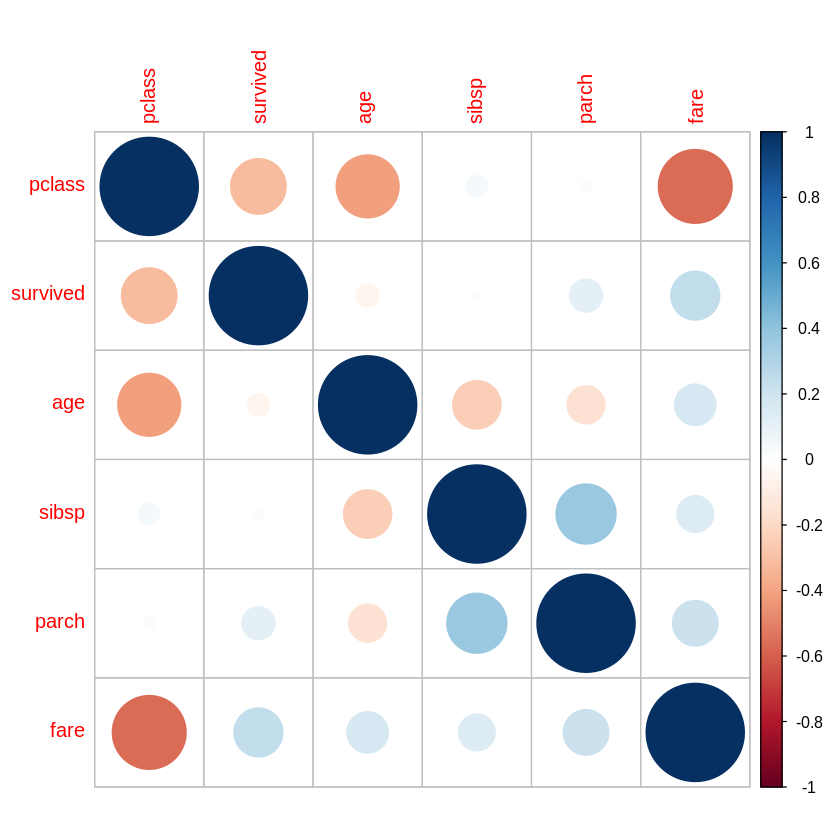

In [150]:
# おまけ：相関行列のヒートマップ
install.packages("corrplot") # Colabではインストール必要
library(corrplot)
corrplot(x)

In [151]:
# 【74】
# scikit-learnを用いてdf2のEnglish、Mathmatics、History列を標準化する

### 標準化とは  
与えられたデータを平均が0で分散が1のデータに変換する操作のこと  
各データ xi から平均 μ を引き，その値を標準偏差 σ で割ることで達成される  
zi=(xi-μ)/σ

In [152]:
head(df2)

,English,Mathmatics,History
,<int>,<int>,<int>
1,80,55,65
2,55,100,83
3,65,70,95
4,40,63,70
5,76,82,79
6,93,68,81


In [153]:
df2_tmp <- df2[, c(-1, -2)]
head(df2_tmp)

[1] 65 83 95 70 79 81

In [154]:
# https://qiita.com/Dixhom/items/aab402ac877f47391d28
df2_scale = scale(df2_tmp); df2_scale

-0.9179171
0.4145432
1.3028501
-0.5477893
0.1184409
0.2664921
-1.8802496
1.3768757
0.4145432
-0.5477893


In [155]:
summary(df2_scale)

       V1         
 Min.   :-1.8802  
 1st Qu.:-0.5478  
 Median : 0.1925  
 Mean   : 0.0000  
 3rd Qu.: 0.4145  
 Max.   : 1.3769  

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



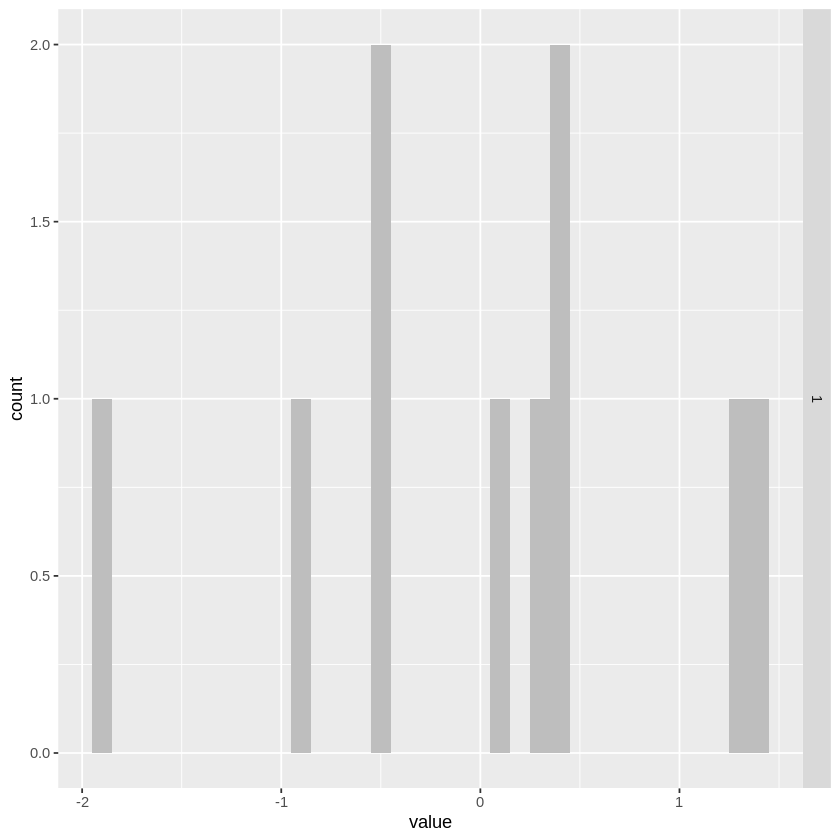

In [158]:
install.packages("ggplot2")
install.packages("reshape2") # 追加
library(ggplot2)
library(reshape2)

ggplot(melt(df2_scale), aes(x=value)) +
    geom_histogram(fill="gray", binwidth=0.1) +
    facet_grid(Var2~., scales="free")

In [159]:
# 【75】
# scikit-learnを用いてdf2のEnglish列を標準化する
# (from sklearn.preprocessing import StandardScalerをインポート)

df2_scale = scale(df2$English); df2_scale

0.5989045
-0.6183810
-0.1314668
-1.3487523
0.4041388
1.2318929
1.5727328
0.2580645
-0.6183810
-1.3487523


In [160]:
# 【76】
# scikit-learnを用いてdf2のEnglish、Mathmatics、History列を
# Min-Maxスケーリングする
# (from sklearn.preprocessing import StandardScalerをインポート)

In [161]:
df2_tmp[1]

[1] 65

In [162]:
# https://webbeginner.hatenablog.com/entry/2014/09/29/232656

df2_scale <- df2_tmp

for (i in 1:3) {
    #最小値
    df2_min <- min(df2_tmp[i])
    #最大値
    df2_max <- max(df2_tmp[i])
    # Min-Maxスケーリング
    df2_scale[i] <- scale(df2_tmp[i], center=df2_min, scale=(df2_max - df2_min))
    }
df2_scale

[1] NaN NaN NaN  70  79  81  52  96  83  70

In [163]:
summary(df2_scale)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  52.00   70.00   79.00   75.86   82.00   96.00       3 

各列の最小値が 0 最大値が 1.0

In [164]:
# 【77】
# dfのfare列の最大値、最小値の行名を取得

# https://bioinfo-dojo.net/2017/08/31/r-which_max/
x = df$fare
which.max(x)

[1] 46

In [165]:
which.min(x)

[1] 8

In [166]:
# 【78】
# dfのfare列の0、25、50、75、100パーセンタイルを取得

In [167]:
# 欠損値がある行を削除
df_tmp<- na.omit(df)
miss_var_summary(df_tmp)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
pclass,0,0
survived,0,0
name,0,0
sex,0,0
age,0,0
sibsp,0,0
parch,0,0
ticket,0,0
fare,0,0


In [168]:
# http://www2.hak.hokkyodai.ac.jp/fukuda/lecture/SocialLinguistics/Rshagen/03averageR.html
x = df_tmp$fare
quantile(x)

0%     25%     50%     75%    100% 
  0.000   8.050  14.500  29.850 227.525

In [169]:
# 【79】
# ①dfのage列の最頻値を取得
# ②value_counts()にてage列の要素数を
# 確認し、①の結果の妥当性を確認

# ①
# https://webbeginner.hatenablog.com/entry/2014/07/03/173000wr
names(which.max(table(df$age)))

[1] "24"

In [170]:
# ②
table(df$age)


0.17 0.33 0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9 
   1    1    1    1    3    3    2   10   12    7   10    5    6    4    6   10 
  10   11 11.5   12   13   14 14.5   15   16   17   18 18.5   19   20 20.5   21 
   4    4    1    3    5    8    2    6   19   20   39    3   29   23    1   41 
  22 22.5   23 23.5   24 24.5   25   26 26.5   27   28 28.5   29   30 30.5   31 
  43    1   26    1   47    1   34   30    1   30   32    3   30   40    2   23 
  32 32.5   33   34 34.5   35   36 36.5   37   38 38.5   39   40 40.5   41   42 
  24    4   21   16    2   23   31    2    9   14    1   20   18    3   11   18 
  43   44   45 45.5   46   47   48   49   50   51   52   53   54   55 55.5   56 
   9   10   21    2    6   14   14    9   15    8    6    4   10    8    1    4 
  57   58   59   60 60.5   61   62   63   64   65   66   67   70 70.5   71   74 
   5    6    3    7    1    5    5    4    5    3    1    1    2    1    2    1 
  76   80 
   1    1 

# ラベリング (80 - 81)

In [171]:
# 【80】
# dfのsex列をラベルエンコーディングし、
# dfの先頭5行を表示
# (from sklearn.preprocessing import LabelEncoderをインポート)

# LabelEncoderというものがあるがインストールの仕方が分からないので断念
# https://www.rdocumentation.org/packages/superml/versions/0.5.3/topics/LabelEncoder
# https://github.com/saraswatmks/superml/tree/master/R
# lbl = LabelEncoder$new()
# df$sex <- lbl$fit_transform(df$sex)
# head(df)

In [218]:
# male を 0 に、women を 1 に変換する問題とする
# 【55】を参照
df["sex"] <- lapply(df["sex"], gsub, pattern="female", replacement = "1")
df["sex"] <- lapply(df["sex"], gsub, pattern="male", replacement = "0") # 順番を間違えると fe0 となってしまう。
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [219]:
# 【81】
# dfのsex列をOne-hotエンコーディングし、
# dfの先頭5行を表示

df <- read.csv("./data/titanic3.csv", header=T)

# 前処理大全p208より。
# Colabでは時間がかかります。
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [220]:
dummy_model <- dummyVars(~sex, data=df, fullRank=FALSE)
df_dummy <- predict(dummy_model, df)
head(df_dummy)

,sexfemale,sexmale
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1


In [221]:
df_dummy2 <- cbind(df, df_dummy)
head(df_dummy2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sexfemale,sexmale
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO",1,0
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON",0,1
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",1,0
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON",0,1
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON",1,0
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY",0,1


In [222]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 3, repr.plot.height = 3)

In [251]:
df <- read.csv("./data/titanic3.csv", header=T)
head(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


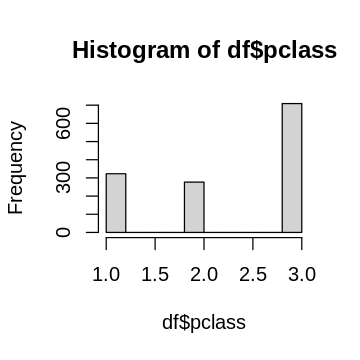

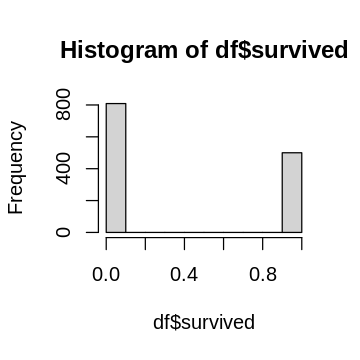

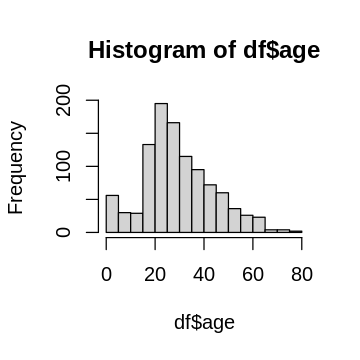

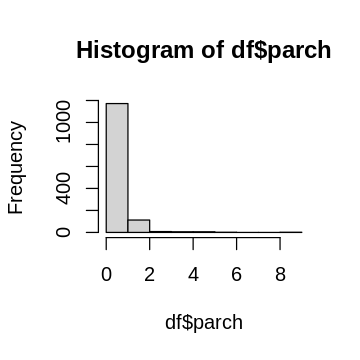

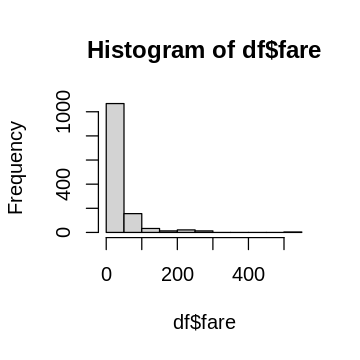

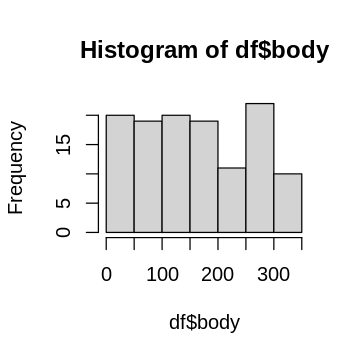

In [224]:
# 【82】
# dfのすべての数値列のヒストグラムを表示

# 全部を一度に描く方法が分からなかったので、順次表示
hist(df$pclass)
hist(df$survived)
hist(df$age)
hist(df$parch)
hist(df$fare)
hist(df$body)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 263 rows containing non-finite values (`stat_bin()`).”


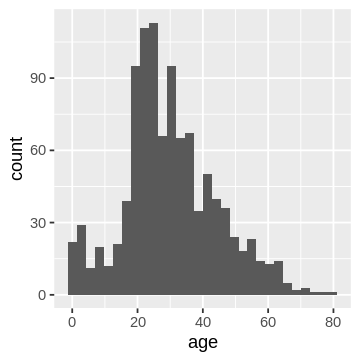

In [225]:
# 【83】
# dfのage列をヒストグラムで表示

# https://www.r-graph-gallery.com/220-basic-ggplot2-histogram.html
g <- ggplot(df, aes(x = age))
g <- g + geom_histogram()
plot(g)

In [226]:
# 【84】
# df2のname列の要素ごとの3科目合計得点を棒グラフで表示
df2 <- read.csv("./data/data1.csv", header=T)
head(df2)

,name,class,English,Mathmatics,History
,<chr>,<int>,<int>,<int>,<int>
1,A,1,80,55,65
2,B,1,55,100,83
3,C,2,65,70,95
4,D,1,40,63,70
5,E,2,76,82,79
6,F,2,93,68,81


In [227]:
df_tmp <- df2[c("English", "Mathmatics", "History")]
sum <- apply(df_tmp, 1, sum)
df_tmp2 <- cbind(df2, sum)
head(df_tmp2)

,name,class,English,Mathmatics,History,sum
,<chr>,<int>,<int>,<int>,<int>,<int>
1,A,1,80,55,65,200
2,B,1,55,100,83,238
3,C,2,65,70,95,230
4,D,1,40,63,70,173
5,E,2,76,82,79,237
6,F,2,93,68,81,242


In [228]:
df_tmp3 <- df_tmp2[c("name", "sum")]
head(df_tmp3)

,name,sum
,<chr>,<int>
1,A,200
2,B,238
3,C,230
4,D,173
5,E,237
6,F,242


In [229]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 4, repr.plot.height = 4)

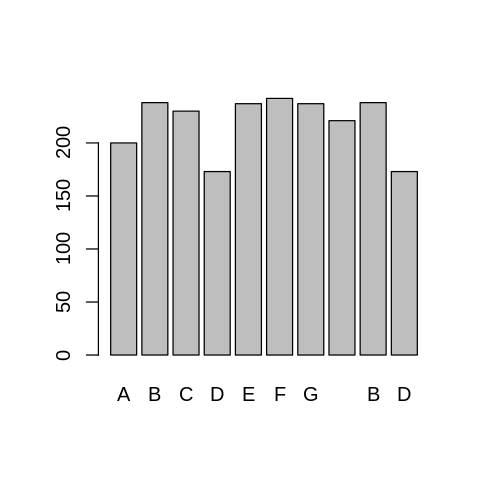

In [230]:
# https://symfoware.blog.fc2.com/blog-entry-1508.html
barplot(df_tmp3[,2], names.arg=df_tmp3$name)

In [231]:
# 【85】
# df2のname列の要素ごとの3科目を棒グラフで
# 並べて表示

df2 <- read.csv("./data/data1.csv", header=T)
df_tmp <- as.matrix(t(df2[c(-1,-2)]))
colnames(df_tmp) <- df2$name
head(df_tmp)

,A,B,C,D,E,F,G,H,B,D
English,80,55,65,40,76,93,100,73,55,40
Mathmatics,55,100,70,63,82,68,85,52,100,63
History,65,83,95,70,79,81,52,96,83,70


In [232]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 6, repr.plot.height = 6)

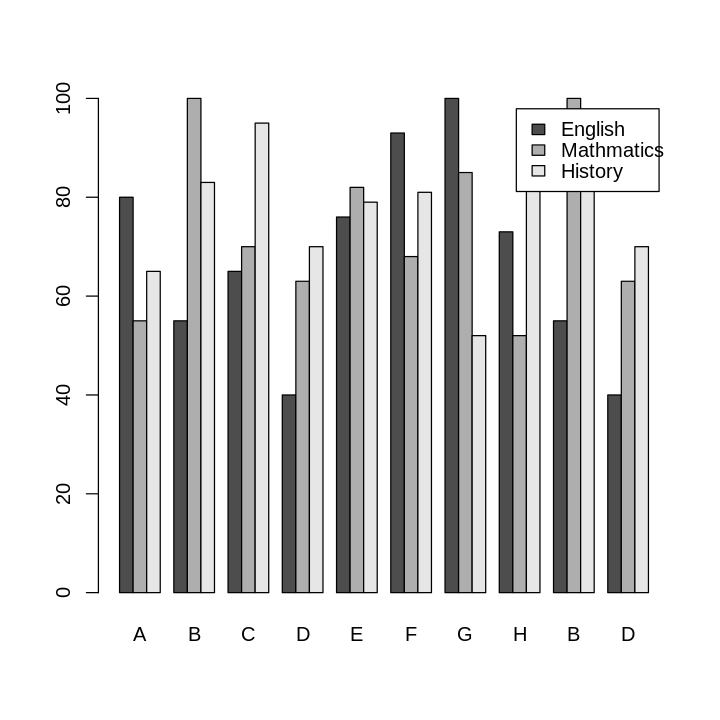

In [233]:
# http://www.isc.meiji.ac.jp/~mizutani/R/spread/basic_graphics.html
barplot(df_tmp, beside = TRUE, legend = rownames(df_tmp))

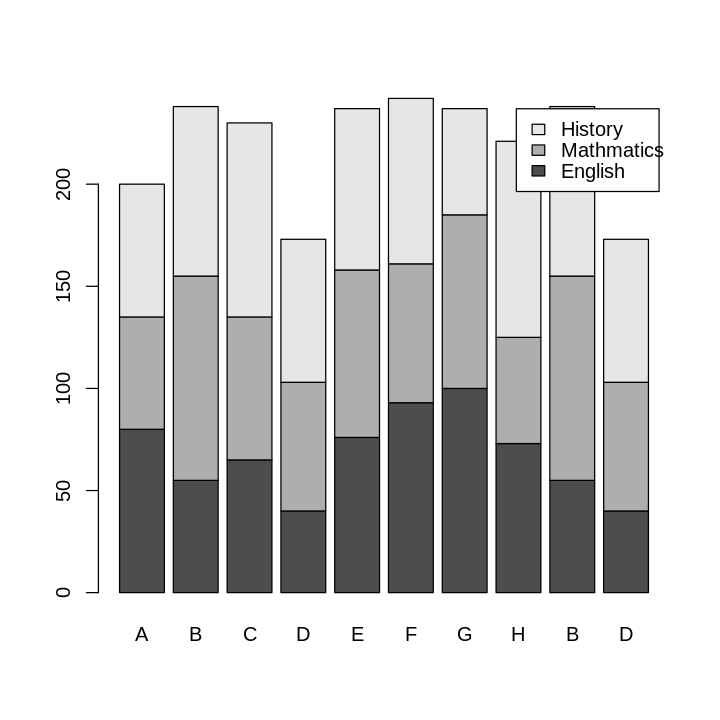

In [234]:
# 【86】
# df2のname列の要素ごとの3科目を積み上げ棒グラフで表示

barplot(df_tmp, legend = rownames(df_tmp))

In [265]:
# 【87】
# dfの各列間の散布図を表示
# (from pandas.plotting import scatter_matrixをインポート)

# pairs(df)

ERROR: Error in pairs.default(df): non-numeric argument to 'pairs'


In [253]:
# 各列のデータ型を調べる
str(df)

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" "" "" ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...


In [263]:
# 数値型のpclass, survived, age, sibsp, parch, fareだけを抽出
columnList <- c("pclass", "survived", "age", "sibsp", "parch", "fare")
df_2 <- df[,columnList]
head(df_2, 3)

,pclass,survived,age,sibsp,parch,fare
,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,1,1,29.00,0,0,211.3375
2,1,1,0.92,1,2,151.5500
3,1,0,2.00,1,2,151.5500


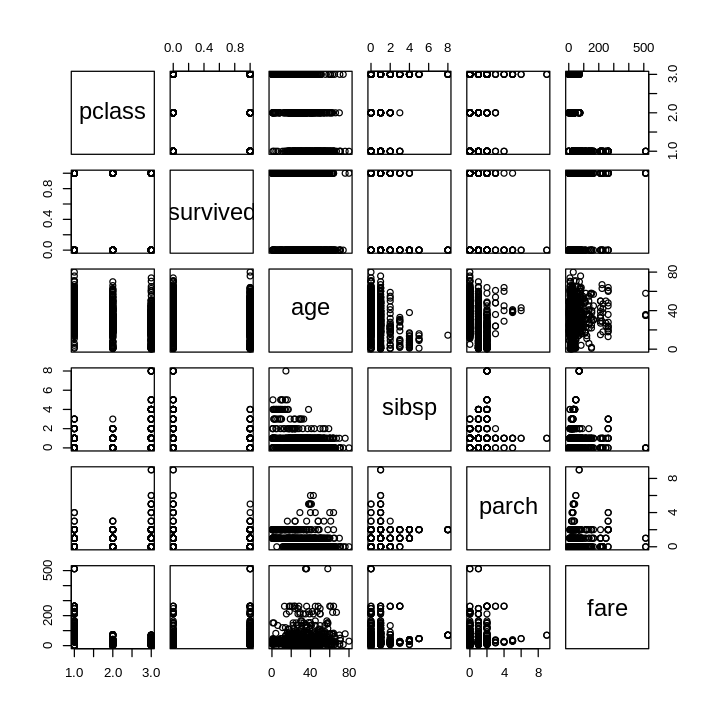

In [267]:
pairs(df_2)

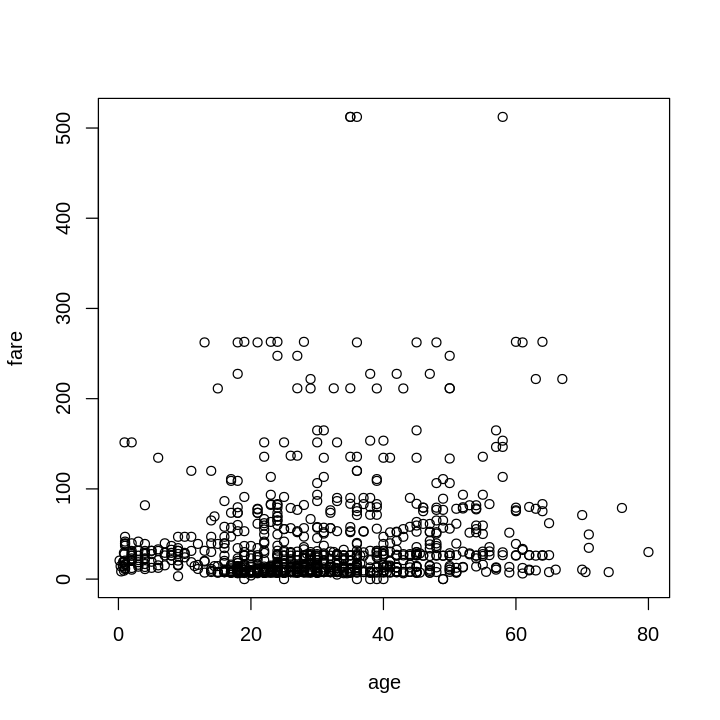

In [268]:
# 【88】
# dfのage列とfare列で散布図を作成

age <- df$age
fare <- df$fare
plot(age, fare)

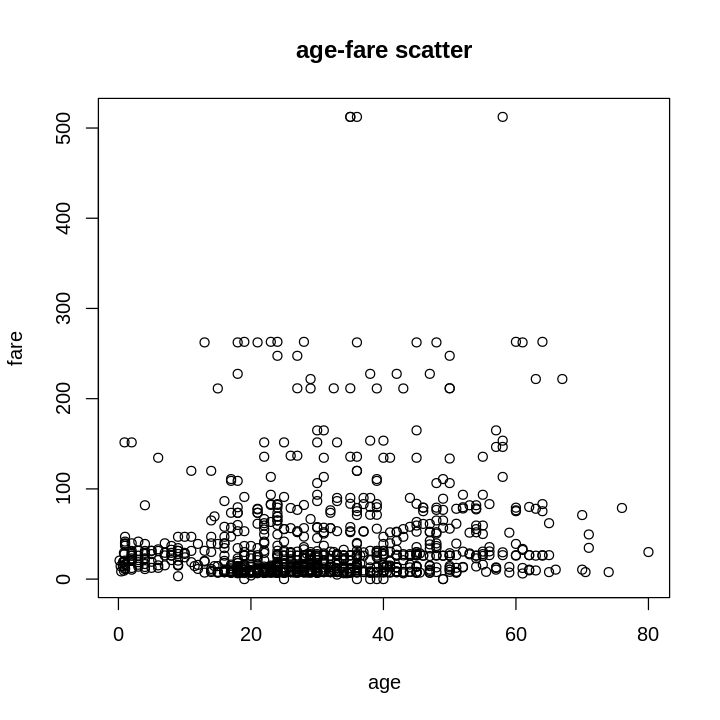

In [269]:
# 【89】
# 【88】で描画したグラフに「age-fare scatter」という
# グラフタイトルをつける

plot(age, fare, main="age-fare scatter")

# タイタニック号の生存者予測 (90 - 100)  
これまで触れてきたタイタニック号の乗客データを使用して、乗客の生存有無を  
予測してみます。  
  
※90～100については順番通りにやらないと上手く動作しません

In [270]:
# 【90】ラベルエンコーディング
# df_copyのsexとembarked列をラベルエンコーディング
# (from sklearn.preprocessing import LabelEncoderをインポート)
# (df_copyはdfをコピーしたもの)

df_copy <- df
df_copy["sex"] <- lapply(df_copy["sex"], gsub, pattern="female", replacement = "1")
df_copy["sex"] <- lapply(df_copy["sex"], gsub, pattern="male", replacement = "0") # 順番を間違えると fe0 となってしまう。

df_copy["embarked"] <- lapply(df_copy["embarked"], gsub, pattern="C", replacement = "1")
df_copy["embarked"] <- lapply(df_copy["embarked"], gsub, pattern="Q", replacement = "2")
df_copy["embarked"] <- lapply(df_copy["embarked"], gsub, pattern="S", replacement = "3")

head(df_copy)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,3,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,3,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,3,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,3,3,NA,"New York, NY"


In [271]:
head(df) # df_copy <- df で deep copy （値渡し）されている --> 【6】参照

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NA,"New York, NY"


In [272]:
# 【91】欠損値確認
# df_copyの欠損値を確認

colSums(is.na(df_copy)) # 【10】参照

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0       263         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [273]:
# 【92】欠損値補完
# df_copyのage、fare列の欠損値を各列の平均値で補完

# install.packages("tidyverse")
library(tidyverse)

In [274]:
age_mean <- mean(df_copy$age, na.rm=TRUE) # na.rm=TRUE とすることで na を無視して平均値を計算することができる
age_mean

[1] 29.88114

In [275]:
df_copy <- replace_na(df_copy, list(age = age_mean)) # replace_na() はtidyverseの関数

In [276]:
colSums(is.na(df_copy))

pclass  survived      name       sex       age     sibsp     parch    ticket 
        0         0         0         0         0         0         0         0 
     fare     cabin  embarked      boat      body home.dest 
        1         0         0         0      1188         0

In [277]:
# 【93】不要列の削除
# df_copyの中で機械学習で使用しない不要な行を削除
# (name, ticket, cabin, boat, body, home.destを削除)

head(df_copy)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,3,2,NA,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,3,11,NA,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,3,,135,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,3,,NA,"Montreal, PQ / Chesterville, ON"
6,1,1,"Anderson, Mr. Harry",0,48.00,0,0,19952,26.5500,E12,3,3,NA,"New York, NY"


In [278]:
df_copy <- df_copy[c(-3, -8, -10, -12, -13, -14)]
head(df_copy)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,1,1,1,29.00,0,0,211.3375,3
2,1,1,0,0.92,1,2,151.5500,3
3,1,0,1,2.00,1,2,151.5500,3
4,1,0,0,30.00,1,2,151.5500,3
5,1,0,1,25.00,1,2,151.5500,3
6,1,1,0,48.00,0,0,26.5500,3


In [279]:
colSums(is.na(df_copy))

pclass survived      sex      age    sibsp    parch     fare embarked 
       0        0        0        0        0        0        1        0

In [280]:
# fare の欠損値の行を削除しておく
df_copy <- na.omit(df_copy)
colSums(is.na(df_copy))

pclass survived      sex      age    sibsp    parch     fare embarked 
       0        0        0        0        0        0        0        0

### ここからは Caret を使って機械学習を行う  
参考：Caret tutorial  
URL：http://www.rebeccabarter.com/blog/2017-11-17-car?t_tutorial/

In [281]:
# 時間がかかる
install.packages("caret")
install.packages("e1071")
install.packages("MLmetrics")
install.packages("doParallel")
install.packages("naniar") # 欠損値処理
install.packages("randomForest") # 機械学習アルゴリズム Random Forest
install.packages("C50")
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [282]:
# load in packages
library(caret)
library(dplyr) # データフレームの操作に特化したパッケ?[ジ
library(e1071) #パッケージ”e1071”には、いくつもの統計手法の関数が含まれる
library(MLmetrics) # Accuracy() に必要
library(naniar) # 欠損値処理
library(randomForest) # 機械学習アルゴリズム Random Forest
library(C50)
library(plyr)

In [283]:
# 並列化演算を行う
# https://logics-of-blue.com/r%E3%81%AB%E3%82%88%E3%82%8B%E6%A9%9F%E6%A2%B0%E5?AD%A6%E7%BF%92%EF%BC%9Acaret%E3%83%91%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B8%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9/
library(doParallel)
cl <- makePSOCKcluster(4)
registerDoParallel(cl)

### 学習用データの準備

In [284]:
# 学習用データと検証用データの作成
set.seed(256)
trainIndex <- createDataPartition(df_copy$survived, p = .8,
                                  list = FALSE,
                                  times = 1)

In [285]:
df_train <- df_copy[ trainIndex,]
df_test  <- df_copy[-trainIndex,]

In [286]:
print(dim(df_train))
print(dim(df_test))

[1] 1047    8
[1] 261   8


### 機械学習

In [287]:
# 学習用データと検証用データの行数確認
cat("train=", nrow(df_train), " test=", nrow(df_test))

train= 1047  test= 261

In [289]:
install.packages("tictoc") # 実行時間の測定のため
library(tictoc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 1. Random Forest

In [290]:
install.packages("randomForest") # 機械学習アルゴリズム Random Forest
library(randomForest) # 機械学習アルゴリズム Random Forest

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [291]:
# fit a random
tic()
model_rf <- train(as.factor(survived) ~ ., # 関数as.factor( )を使うことによって，factor型を変換
                data = df_train,
                method = 'rf')
toc()

54.044 sec elapsed


In [292]:
model_rf

Random Forest 

1047 samples
   7 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1047, 1047, 1047, 1047, 1047, 1047, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8044025  0.5729484
  5     0.7926865  0.5576918
  9     0.7792594  0.5325938

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [293]:
pred <- predict(model_rf, df_test)
pred

[1] 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 [38] 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [75] 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
[112] 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[223] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[260] 0 0
Levels: 0 1

In [294]:
confusionMatrix(pred, as.factor(df_test$survived)) # 比較するデータのlevelを合わせないとエラーが出る

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 154  38
         1  13  56
                                          
               Accuracy : 0.8046          
                 95% CI : (0.7512, 0.8509)
    No Information Rate : 0.6398          
    P-Value [Acc > NIR] : 4.782e-09       
                                          
                  Kappa : 0.5499          
                                          
 Mcnemar's Test P-Value : 0.0007775       
                                          
            Sensitivity : 0.9222          
            Specificity : 0.5957          
         Pos Pred Value : 0.8021          
         Neg Pred Value : 0.8116          
             Prevalence : 0.6398          
         Detection Rate : 0.5900          
   Detection Prevalence : 0.7356          
      Balanced Accuracy : 0.7590          
                                          
       'Positive' Class : 0               
                              

In [295]:
Accuracy(pred, df_test$survived)

[1] 0.8045977

In [296]:
# グラフの出力サイズの設定
# https://stackoverrun.com/ja/q/11752310
options(repr.plot.width = 3, repr.plot.height = 2)

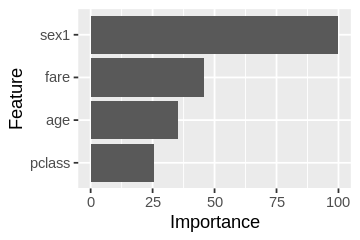

In [297]:
# 特徴量の重要度
# pipeline 表記
model_rf %>%
  varImp() %>%
  ggplot(top = 4)

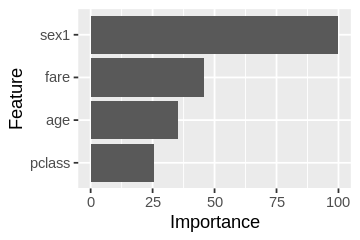

In [298]:
vi <- varImp(model_rf)
ggplot(vi, top = 4)

In [299]:
print(vi)

rf variable importance

          Overall
sex1      100.000
fare       45.910
age        35.394
pclass     25.647
sibsp      11.394
parch      10.590
embarked1   5.825
embarked3   2.898
embarked2   0.000


### 2. Support Vector Machin (Kernel法)

In [301]:
install.packages("kernlab")
library(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:tictoc’:

    size


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:ggplot2’:

    alpha




In [302]:
# fit a random
tic()
model_sv <- train(as.factor(survived) ~ ., # 関数as.factor( )を使うことによって，factor型を変換
                data = df_train,
                method = 'svmPoly',
                preProcess = c("center","scale"))
toc()

48.3 sec elapsed


In [303]:
model_sv

Support Vector Machines with Polynomial Kernel 

1047 samples
   7 predictor
   2 classes: '0', '1' 

Pre-processing: centered (9), scaled (9) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1047, 1047, 1047, 1047, 1047, 1047, ... 
Resampling results across tuning parameters:

  degree  scale  C     Accuracy   Kappa     
  1       0.001  0.25  0.6135516  0.00000000
  1       0.001  0.50  0.6199619  0.02057128
  1       0.001  1.00  0.7295481  0.35644820
  1       0.010  0.25  0.7874101  0.54515059
  1       0.010  0.50  0.7864733  0.54282657
  1       0.010  1.00  0.7864733  0.54282657
  1       0.100  0.25  0.7864733  0.54282657
  1       0.100  0.50  0.7864733  0.54282657
  1       0.100  1.00  0.7864733  0.54282657
  2       0.001  0.25  0.6202691  0.02166470
  2       0.001  0.50  0.7297499  0.35700498
  2       0.001  1.00  0.7876328  0.54561381
  2       0.010  0.25  0.7864733  0.54282657
  2       0.010  0.50  0.7876188  0.54504383
  2       0.010  1.00  0.7903946 

In [304]:
pred <- predict(model_sv, df_test)
pred

[1] 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 [38] 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [75] 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1
[112] 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
[149] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
[186] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
[223] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
[260] 0 0
Levels: 0 1

In [305]:
confusionMatrix(pred, as.factor(df_test$survived)) # 比較するデータのlevelを合わせないとエラーが出る

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 146  36
         1  21  58
                                          
               Accuracy : 0.7816          
                 95% CI : (0.7265, 0.8302)
    No Information Rate : 0.6398          
    P-Value [Acc > NIR] : 5.203e-07       
                                          
                  Kappa : 0.509           
                                          
 Mcnemar's Test P-Value : 0.06369         
                                          
            Sensitivity : 0.8743          
            Specificity : 0.6170          
         Pos Pred Value : 0.8022          
         Neg Pred Value : 0.7342          
             Prevalence : 0.6398          
         Detection Rate : 0.5594          
   Detection Prevalence : 0.6973          
      Balanced Accuracy : 0.7456          
                                          
       'Positive' Class : 0               
                              

In [306]:
Accuracy(pred, df_test$survived)

[1] 0.7816092

Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


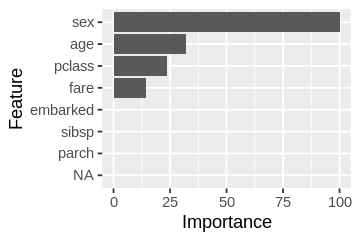

In [307]:
# 特徴量の重要度
model_sv %>%
  varImp() %>%
  ggplot(top = 8)